# Real time Implementations using Default Boxes

## YOLO (CVPR 2016)

* Source
  * Official implementation
    * https://github.com/pjreddie/darknet 
* Source Code Analysis
  * Setup for Original Paper: ./cfg/yolov1/yolo-small.cfg
  * loss function: src/detection_layer.c
    * forward_detection_layer(...) 
  
'''python

    train_yolo(...)
    load_data_in_thread(...)
    load_data_region(...)
    fill_truth_region(...)

    for (i = 0; i < count; ++i) {
        x =  boxes[i].x;
        y =  boxes[i].y;
        w =  boxes[i].w;
        h =  boxes[i].h;
        id = boxes[i].id;

        if (w < .005 || h < .005) continue;

        int col = (int)(x*num_boxes);
        int row = (int)(y*num_boxes);

        x = x*num_boxes - col;
        y = y*num_boxes - row;

        int index = (col+row*num_boxes)*(5+classes);
        if (truth[index]) continue;
        truth[index++] = 1;

        if (id < classes) truth[index+id] = 1;
        index += classes;

        truth[index++] = x;
        truth[index++] = y;
        truth[index++] = w;
        truth[index++] = h;

'''

## SSD: Single Shot MultiBox Detector (ECCV 2016)

* Source
  * Official Implementation
    * https://github.com/weiliu89/caffe/tree/ssd
  * Other implementation
    * https://github.com/balancap/SSD-Tensorflow/
  
* Contribution points
  * Anchoring
  * Multi scale Detection (c.f. Faster-R-CNN
  * Use Convolution Layer instead of Fully Connnected Layer in the Last layer (c.f. YOLO) 
  
* data
  * Training data: trainval.txt in VOC2012 + 2007
  * Test data: test.txt in VOC2007
  

### Code Analysis
* example/ssd/ssd_pascal.py
  * multibox_loss_param
    * parameter를 셋팅하는 부분
* src/caffe/util/bbox_util.cpp
  * MineHardExample(...)
    * 제일 헷갈리는 부분
    * share_location 와 loc_classes: location 관련 prediction을 할때 하나의 label에 대해서 각각 따로 할 수 있고(지금까지 없었던 내용이다.) label에 상관없이 한번만 하는 방식이 있다.(지금까지 살펴본 방식)
    * Hard Negative mining을 위해서는 Highest Confidence  Loss ( Class에 대한 Loss) 가 높을 수록(많이 틀릴수록) negative set을 결정한다.

## YOLO v2

* Source
  * Official implementation
    * https://github.com/pjreddie/darknet
  * Other Implementation
    * https://github.com/thtrieu/darkflow

### YOLO vs YOLO v2
* Anchoring
* Resolutions
** Final layer widthxheight: 7x7 -> 13x13
** Input layer 428x428 -> 416x416
* Class predition and Bounding Box coordinates Regression detailed

## Fast and Lightweight Object Detection Network: Detection and Recognition on Resource Constrained Devices
* Pontifícia Universidade Católica de Minas Gerais, 2018
### Background

### Main Strategy
* Suggest new type of labels. Grid based Segmented Label, Not Pixelwise, Not Bounding Box
* Just make heatmaps
* Shallow layers
* Reconstruct traditional Bounding Box from the heatmap
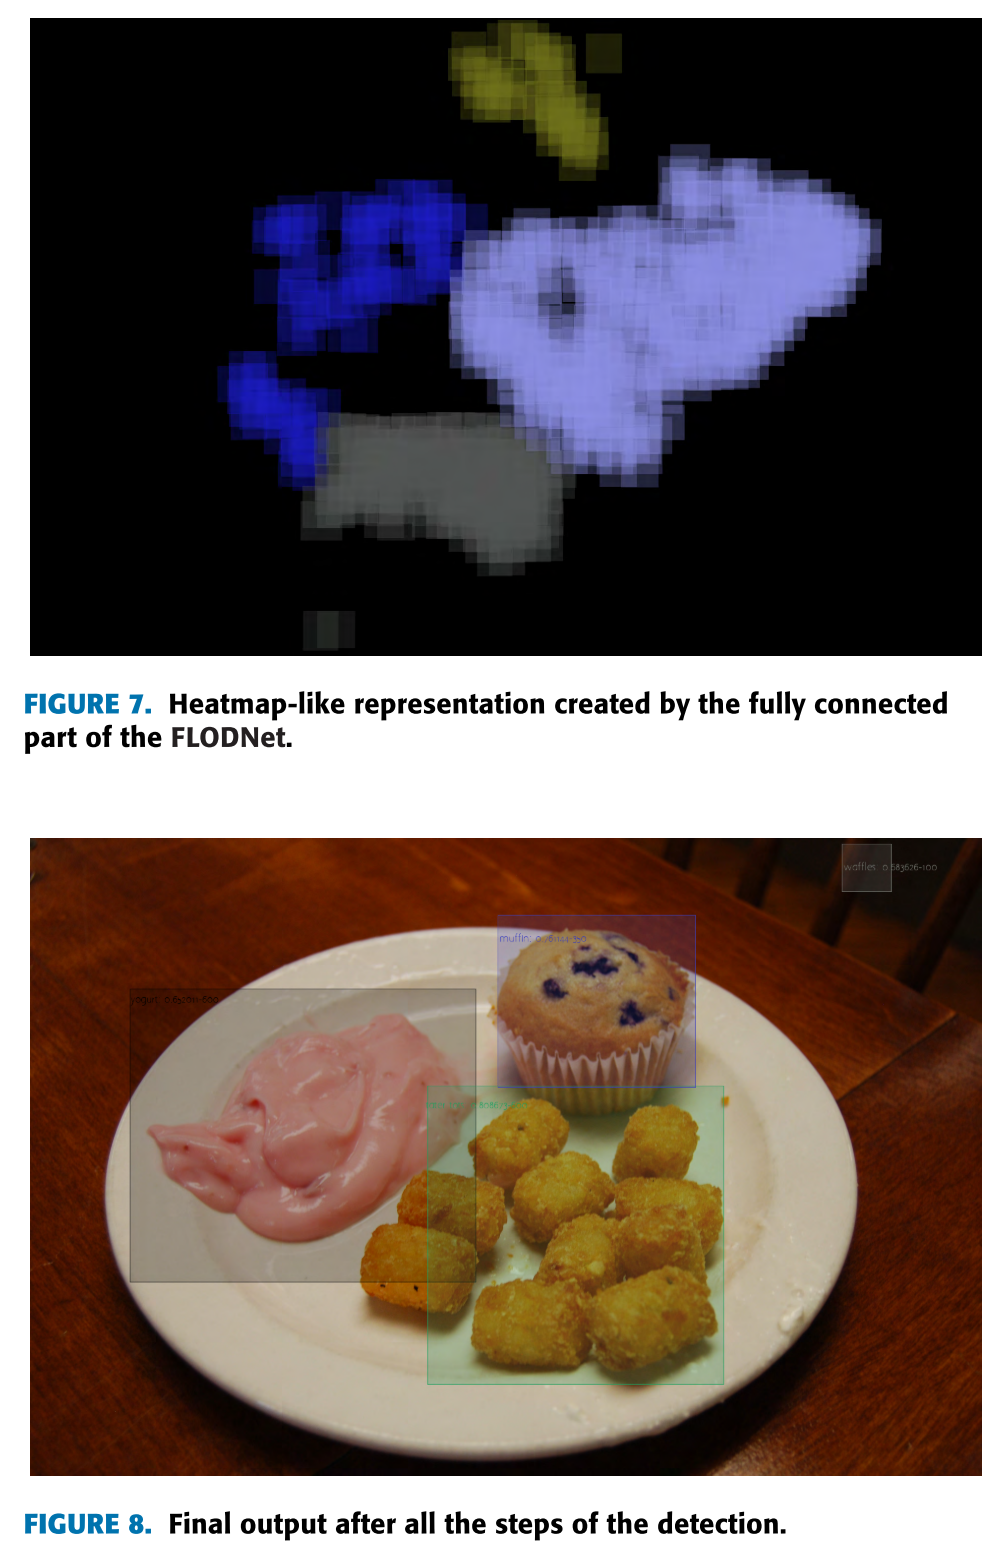